In [1]:
import cv2
from PIL import Image,ImageCms
from skimage import color, io
from scipy.ndimage import gaussian_filter
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 


#### Limitation value of Lab
       *0 < L < 100                
       * -127 < a < 127 
       * -127 < b < 127
#### CV2 Limitation value of Lab
       * 0<L<255
       * 0<a<255
       * 0<b<255

#### Question 1.a --------------------------

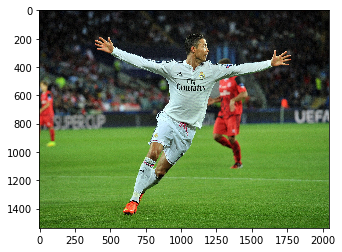

In [2]:

im = Image.open('Cristiano-Ronaldo.jpg').convert('RGB')
plt.imshow(im)

#Lab_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2LAB)

#### -----------------------------------------

In [3]:
#cv2.imshow('sof', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#pix_val = list(im.getdata()) // convert image into pixels

rgb = cv2.imread('Cristiano-Ronaldo.jpg')
Lab = cv2.cvtColor(rgb, cv2.COLOR_BGR2LAB)
Lab_L = Lab[:,:,0] # separate Luminance value from Lab
Lab_a = Lab[:,:,1]
Lab_b = Lab[:,:,2]


#### Question 1.b ---------------------------

In [4]:
Lab_L

array([[  6,   9,  24, ...,  14,  17,   9],
       [  3,   7,  19, ...,  12,  11,   2],
       [  8,   8,  14, ...,  11,  10,   2],
       ...,
       [109, 117,  97, ..., 117, 116, 116],
       [115, 111,  86, ..., 113, 111, 117],
       [105, 106,  79, ..., 105, 103, 112]], dtype=uint8)

Text(0.5, 1.0, 'Grey Image of component_L')

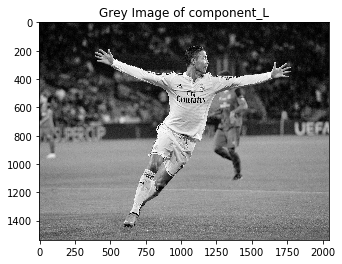

In [5]:
plt.imshow(Lab_L, cmap = 'gray')  #component L
plt.title('Grey Image of component_L')

Text(0.5, 1.0, 'Grey Image of component_a')

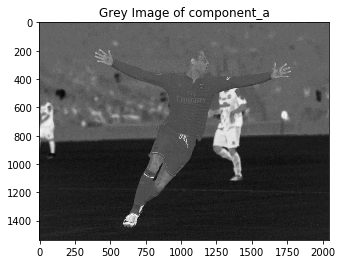

In [6]:
plt.imshow(Lab_a, cmap = 'gray') # Component a
plt.title('Grey Image of component_a')

Text(0.5, 1.0, 'Grey Image of component_b')

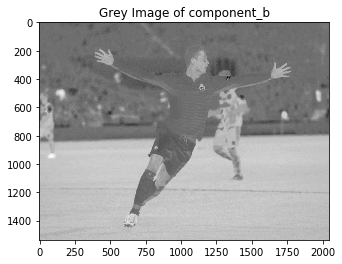

In [7]:
plt.imshow(Lab_b, cmap = 'gray') #Component b
plt.title('Grey Image of component_b')

#### Question 1.c ------------------------

#### gaussian kernel. manually calculate
```python
def gau_kern(l=5, sig=2):
    """\
    creates gaussian kernel with side length l and a sigma of sig
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)
```

In [8]:
lab = color.rgb2lab(im)
lab_l = lab[:,:,0]
data_x_deriv = lab_l
filter_x = gaussian_filter(lab_l, sigma=5, order = (0,1), output = data_x_deriv)

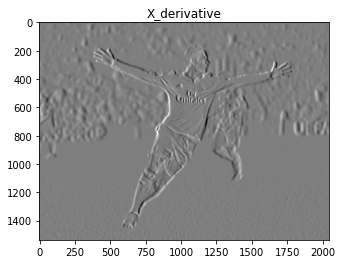

In [9]:
plt.imshow(data_x_deriv, cmap = 'gray')
plt.title('X_derivative')
plt.show()

In [10]:
# vertical direction
data_y_deriv = lab[:,:,0]
filter_y = gaussian_filter(lab_l, sigma=5, order = (1,0), output = data_y_deriv)

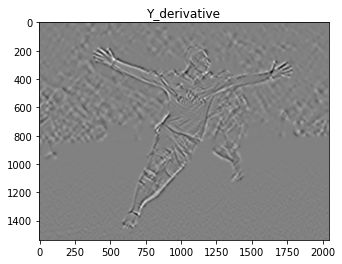

In [11]:
plt.imshow(data_y_deriv, cmap = 'gray')
plt.title('Y_derivative')
plt.show()

#### Question 1.d -----------------------------

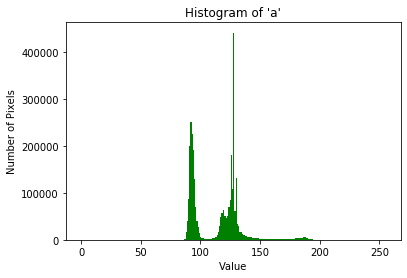

In [12]:
# show component a in histogram
Lab_a_flatten = Lab_a.flatten()
n, bins,patches = plt.hist(Lab_a_flatten,bins = 256, facecolor = 'g', range = (0, 255))
plt.xlabel('Value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of \'a\'')
#plt.grid(True)
plt.show()

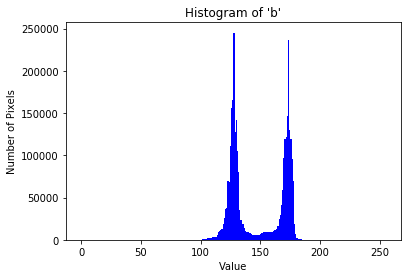

In [13]:
#show component b in histogram
Lab_b_flatten = Lab_b.flatten()
n, bins,patches = plt.hist(Lab_b_flatten,bins = 256, facecolor = 'b', range = (0, 255))
plt.xlabel('Value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of \'b\'')
#plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Component a and b Heat map')

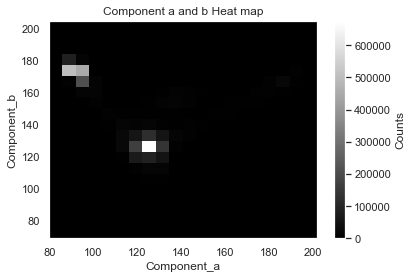

In [14]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

#component a heat map
fig2 = plt.figure()
plt.hist2d(Lab_a_flatten, Lab_b_flatten, bins=[20,20],cmap = 'gray')
plt.xlabel('Component_a')
plt.ylabel('Component_b')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.title('Component a and b Heat map')

#### Question 1.e ------------------------------

In [15]:
Original_image = cv2.imread('Cristiano-Ronaldo.jpg')
Lab_Original = cv2.cvtColor(Original_image, cv2.COLOR_BGR2LAB)

In [16]:
roi = cv2.imread('Back_projection.jpg')
Lab_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2LAB)
#roi = io.imread('Back_projection.jpg')
#Lab_roi = color.rgb2lab(roi)
Lab_roi.shape

(268, 311, 3)

In [17]:
roi_hist = cv2.calcHist([Lab_roi], [1,2], None,[255,255] , [0,256,0,256])
mask = cv2.calcBackProject([Lab_Original],[1,2], roi_hist,[0,256,0,256],1)

In [18]:
# Filtering remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 30, 255, cv2.THRESH_BINARY)
mask = cv2.merge((mask, mask, mask))
#print(mask.shape)
#Original_image.shape

In [19]:
result = cv2.bitwise_and(Original_image, mask)

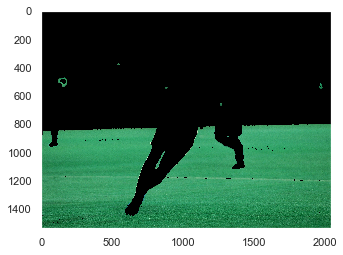

In [20]:
plt.imshow(result)
plt.grid(False)
plt.show()
#cv2.imwrite('Backprojection.jpg',result) -- download the picture

#### Question 1.f -------------------------

In [21]:
Lab_L_flatten = Original_image[:,:,0].flatten()
cdf = Lab_L_flatten.cumsum()
cdf_normalized = cdf * Lab_L_flatten.max()/ cdf.max()


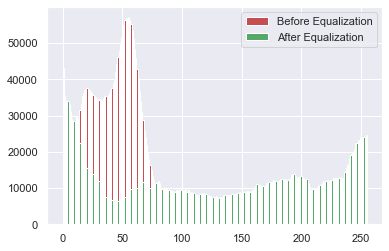

In [22]:
n, bins,patches = plt.hist(Lab_L_flatten,bins = 256, facecolor = 'r', 
                           range = (0, 255), label = "Before Equalization")
n, bins,patches = plt.hist(cdf_normalized,bins = 256, facecolor = 'g', 
                           range = (0, 255), label = "After Equalization")
#red: before equalization; green:after equalization
plt.legend()

In [23]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')


In [24]:
ass = Original_image[:,:,0]
img2 = cdf[ass]

In [25]:
#### -------------------

In [26]:
ori_img = cv2.imread('Cristiano-Ronaldo.jpg')
img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2LAB)
img = img[:,:,0]
img.shape

(1536, 2048)

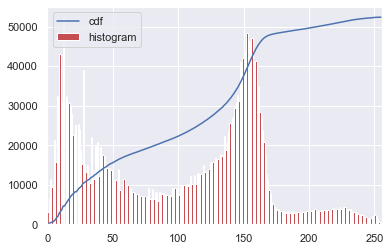

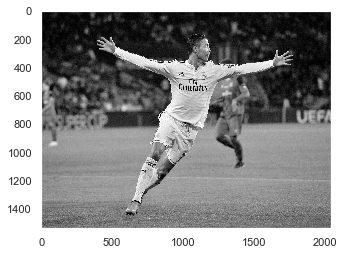

In [27]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.imshow(img, cmap = 'gray')
plt.grid(False)
#cv2.imwrite('before_equal.jpg',img) 

In [28]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [29]:
img2 = cdf[img]

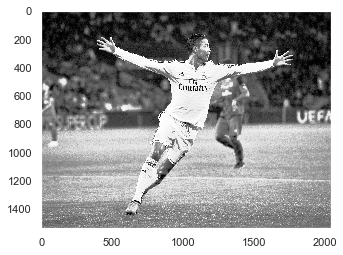

In [30]:
plt.imshow(img2, cmap = 'gray')
plt.grid(False)
#cv2.imwrite('After_equal.jpg',img2) 

#### End of Code------------------------------------